# Data distribution and statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/DQ-dataset.csv", sep="\t",index_col=0,decimal=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456644 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         456644 non-null  int64  
 1   BasketDate       456644 non-null  object 
 2   Sale             456644 non-null  float64
 3   CustomerID       456644 non-null  object 
 4   CustomerCountry  456644 non-null  object 
 5   ProdID           456644 non-null  object 
 6   ProdDescr        456644 non-null  object 
 7   Qta              456644 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ MB


## BasketID
Il basketID è un nominale vediamo da che caratteri è composto (numeri lettere ecc)

In [72]:
'''print("MAIUSC: "+str(df.BasketID.str.contains('[A-Z]').any()))
print("minuscole: "+str(df.BasketID.str.contains('[a-z]').any()))
print("Numeri: "+str(df.BasketID.str.contains('[0-9]').any()))
print("Segni speciali: "+str(df.BasketID.str.contains('[^A-Za-z0-9]').any()))'''

'print("MAIUSC: "+str(df.BasketID.str.contains(\'[A-Z]\').any()))\nprint("minuscole: "+str(df.BasketID.str.contains(\'[a-z]\').any()))\nprint("Numeri: "+str(df.BasketID.str.contains(\'[0-9]\').any()))\nprint("Segni speciali: "+str(df.BasketID.str.contains(\'[^A-Za-z0-9]\').any()))'

## BasketDate
Per questo attributo verifichiamo a che intervallo di date include. Per fare ciò cambiamo il tipo della colonna

In [73]:
df_for_dates=df.copy()
df_for_dates["BasketDate"] = pd.to_datetime(df_for_dates['BasketDate'])
df_for_dates.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


Vediamo che anni sono inclusi

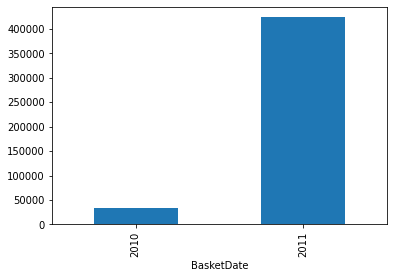

In [74]:
df_for_dates["BasketDate"].groupby(df_for_dates["BasketDate"].dt.year).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2011

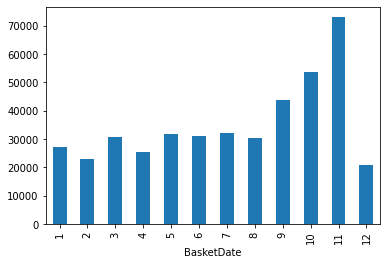

In [75]:
df_for_dates[df_for_dates['BasketDate'] >= '2011-01-01']["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

Verifichiamo la distribuzione dei dati per gli acquisti del 2010

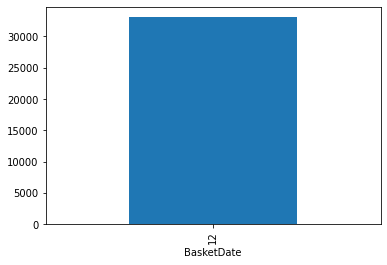

In [76]:

mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.month).count().plot(kind="bar")

In [77]:
print("Distinct Values in CustomerCountry:\t", df.CustomerCountry.unique(), "Len: \n", len(df.CustomerCountry.unique()))
print("Distinct Values in ProdID:\t", df.ProdID.unique(), "Len: \n", len(df.ProdID.unique()))

Distinct Values in CustomerCountry:	 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Finland' 'Austria' 'Sweden' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Brazil' 'USA' 'Malta' 'RSA'] Len: 
 36
Distinct Values in ProdID:	 ['85123A' '71053' '84406B' ... '90179B' '90214U' '23645'] Len: 
 3851


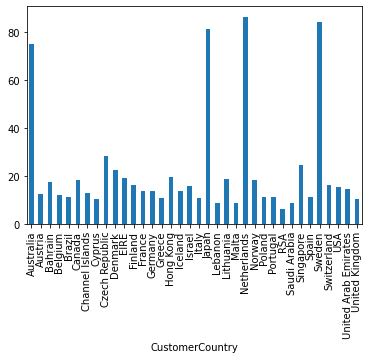

In [78]:
#Ordini medi per nazione
df.groupby("CustomerCountry")["Qta"].mean().plot(kind="bar")


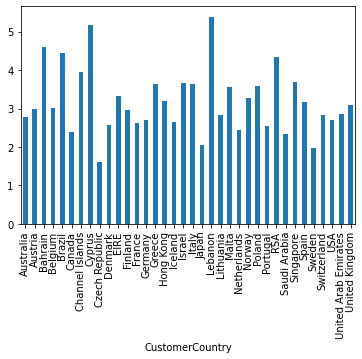

In [79]:
#Sale medio per nazione
df.groupby("CustomerCountry")["Sale"].mean().plot(kind="bar")

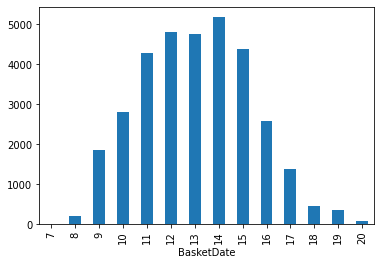

In [80]:
#acquisti per ora effettuati nell'anno 2010.
mask=(df_for_dates['BasketDate'] > '2010-01-01' ) & (df_for_dates['BasketDate'] < '2011-01-01')
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

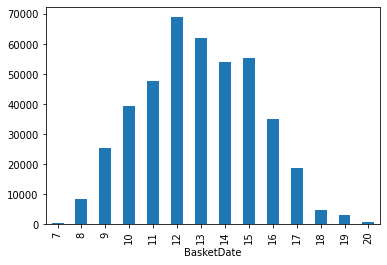

In [81]:
#acquisti per ora effettuati nell'anno 2011.
mask=(df_for_dates['BasketDate'] > '2011-01-01' )
df_for_dates[mask]["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

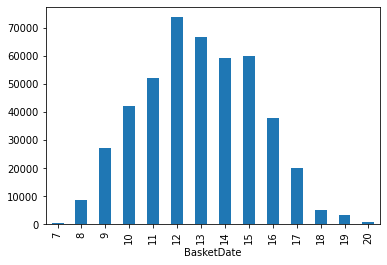

In [82]:
#acquisti per ora effettuati in tutto il dataset
df_for_dates["BasketDate"].groupby(df_for_dates["BasketDate"].dt.hour).count().plot(kind="bar")

In [83]:
#Ordini effettuati per utente (-1 = Customer ID null)
    #unique basketID per user
print("Iniziali: :" , str(len(df.BasketID)))
print("Unici: ", str(len(df.BasketID.unique())))
temp = df.drop_duplicates(subset=['BasketID'], keep='last')
print("Actual for query: ", str(len(temp.BasketID)))
temp.groupby(by="CustomerID", as_index=True)["BasketID"].count()

Iniziali: : 456644
Unici:  19518
Actual for query:  19518


CustomerID
10023N    1
10202N    1
10353N    1
10370N    1
10374N    1
         ..
99606N    1
99733N    1
9983N     1
99958N    1
99983N    1
Name: BasketID, Length: 5575, dtype: int64

In [84]:
#Sale medio per customer id
df.groupby("CustomerID")["Sale"].mean()

CustomerID
10023N     5.954000
10202N    12.750000
10353N     5.109479
10370N     4.590915
10374N     3.630306
            ...    
99606N     4.821667
99733N     3.106667
9983N      2.916667
99958N     5.761667
99983N     3.434091
Name: Sale, Length: 5575, dtype: float64

In [85]:
print("DISTRIBUZIONE PROBABILITà QUANTITà")
print(df["Qta"].describe())
print("DISTRIBUZIONE PROBABILITà SALE")
print(df["Sale"].describe())

DISTRIBUZIONE PROBABILITà QUANTITà
count    456644.000000
mean         11.244788
std          39.262725
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max        4800.000000
Name: Qta, dtype: float64
DISTRIBUZIONE PROBABILITà SALE
count    456644.000000
mean          3.069738
std           4.211134
min           0.001000
25%           1.250000
50%           2.080000
75%           3.750000
max         649.500000
Name: Sale, dtype: float64


----------------------------------------------------------------------
ProdID:  85123A :  WHITE HANGING HEART T-LIGHT HOLDER
ProdID:  21212 :  PACK OF 72 RETROSPOT CAKE CASES
ProdID:  85099B :  JUMBO BAG RED RETROSPOT
ProdID:  22423 :  REGENCY CAKESTAND 3 TIER
ProdID:  47566 :  PARTY BUNTING


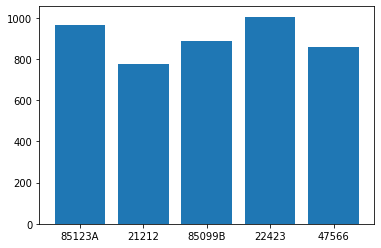

In [24]:
#Item best preferred for all user
prods = df.ProdID.unique()
d = {i: 0 for i in prods} #prodotti venduti maggiormente
for customer in df.CustomerID.unique():
        result = df[df["CustomerID"] == customer]
        result = result.groupby("ProdID").sum()
        if(len(result)!=0):
                for i in range(len(result)):
                        d[result.iloc[i].name]+=1
               
        else: print("NO ACQUISTI CustomerID ", customer)

print("----------------------------------------------------------------------")
#prodotti più selezionati dai clienti
x = 5
d = {key: value for key, value in d.items() if value in sorted(set(d.values()), reverse=True)[:x]}

keys = d.keys()
values = d.values()
plt.bar(keys, values, align='center')
for i in d:
        print("ProdID: ", i, ": ", df[df["ProdID"]==i]["ProdDescr"].unique()[0])

        

Nazione  United Kingdom  :  INFLATABLE POLITICAL GLOBE 
Nazione  France  :  INFLATABLE POLITICAL GLOBE 
Nazione  Australia  :  ASSORTED COLOURS SILK FAN
Nazione  Netherlands  :  ASSORTED COLOURS SILK FAN
Nazione  Germany  :  INFLATABLE POLITICAL GLOBE 
Nazione  Norway  :  COLOURING PENCILS BROWN TUBE
Nazione  EIRE  :  INFLATABLE POLITICAL GLOBE 
Nazione  Switzerland  :  INFLATABLE POLITICAL GLOBE 
Nazione  Spain  :  INFLATABLE POLITICAL GLOBE 
Nazione  Poland  :  EDWARDIAN PARASOL BLACK
Nazione  Portugal  :  COLOURING PENCILS BROWN TUBE
Nazione  Italy  :  ASSORTED COLOURS SILK FAN
Nazione  Belgium  :  SANDALWOOD FAN
Nazione  Lithuania  :  EDWARDIAN PARASOL BLACK
Nazione  Japan  :  INFLATABLE POLITICAL GLOBE 
Nazione  Iceland  :  SMALL FOLDING SCISSOR(POINTED EDGE)
Nazione  Channel Islands  :  WRAP ENGLISH ROSE 
Nazione  Denmark  :  ASSORTED COLOURS SILK FAN
Nazione  Cyprus  :  EDWARDIAN PARASOL NATURAL
Nazione  Finland  :  EDWARDIAN PARASOL BLACK
Nazione  Austria  :  EDWARDIAN PARASOL 

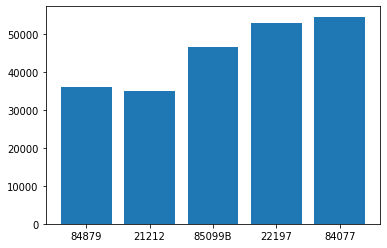

In [25]:
#Item best sold for each country and prodotti venduto maggiormente
from collections import Counter
prods = df.ProdID.unique()
d = {i: 0 for i in prods} #prodotti venduti maggiormente

for country in df.CustomerCountry.unique():
        result = df[df["CustomerCountry"] == country]
        result = result.groupby("ProdID").sum()
        for i in range(len(result)):
                d[result.iloc[i].name]+=result.iloc[i]["Qta"] 
        print("Nazione ", country, " : ", df[df["ProdID"]==result.iloc[0].name]["ProdDescr"].unique()[0])

print("----------------------------------------------------------------------")
#Primi X item più venduti tra le nazioni
x = 5
d = {key: value for key, value in d.items() if value in sorted(set(d.values()), reverse=True)[:x]}
keys = d.keys()
values = d.values()
plt.bar(keys, values, align='center')
for i in d:
        print("ProdID: ", i, ": ", df[df["ProdID"]==i]["ProdDescr"].unique()[0])
   
            
                
        

In [4]:
#acquisti per giorno 2010
temp = df.drop("CustomerID",axis=1)

temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp["BasketDate"] <= '2010-12-31']
temp["Total"] = temp["Qta"]*temp["Sale"]
temp = temp.sort_values(["Total"])
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='D'))
                  .sum()
                  .rename(columns=lambda c: str(c).lower()))

basketid    1.032745e+09
sale        8.060650e+03
qta         2.201200e+04
total       6.686381e+04
Name: 2010-12-06, dtype: float64
66863.80999999995


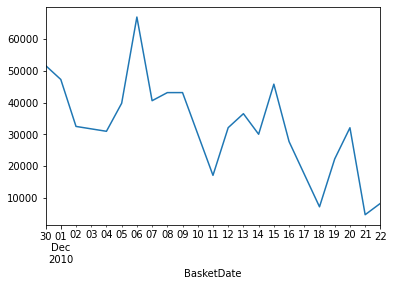

In [65]:
res["total"].plot()
print(res.iloc[res["total"].argmax()])
print(res["total"].max())


In [140]:
#acquisti per giorno 2011
temp2 = df.drop("CustomerID",axis=1)

temp2["BasketDate"] = pd.to_datetime(temp2['BasketDate']).dt.date
temp2["BasketDate"] = pd.to_datetime(temp2["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp2 = temp2[temp2["BasketDate"] > '2010-12-31']
temp2["Total"] = temp2["Qta"]*temp2["Sale"]
temp2 = temp2.sort_values(["Total"])
res2 = (temp2.groupby(pd.PeriodIndex(temp2.BasketDate, freq='D'))
                  .sum()
                  .rename(columns=lambda c: str(c).lower()))

basketid    8.823910e+08
sale        4.850820e+03
qta         4.158800e+04
total       9.998141e+04
Name: 2011-09-19, dtype: float64
99981.41


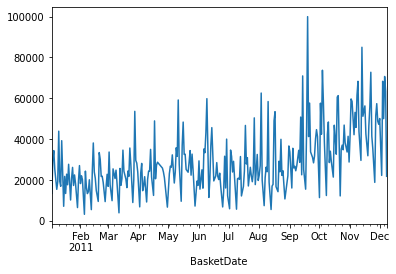

In [141]:
res2["total"].plot()
print(res2.iloc[res2["total"].argmax()])
print(res2["total"].max())

In [3]:
tot = 0
tot_sale = 0
#acquisti per trimestre 2010
temp = df.drop("CustomerID",axis=1)
temp["Total_Sale"] = temp["Sale"]*temp["Qta"]
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp['BasketDate'] < "2011-01-01"] 
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='Q'))
                  .sum()
                  .rename(columns=lambda c: str(c).lower()))
print(res.head())

#acquisti per trimestre 2011

temp = df.drop("CustomerID",axis=1)
temp["Total_Sale"] = temp["Sale"]*temp["Qta"]
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(1,unit="d") )
temp = temp[temp['BasketDate'] >= "2011-01-01"] 
res = (temp.groupby(pd.PeriodIndex(temp.BasketDate, freq='Q'))
                 .sum()
                  .rename(columns=lambda c: str(c).lower()))
print(res.head())


               basketid       sale     qta  total_sale
BasketDate                                            
2010Q4      17819303375  115595.78  330375   660450.71
               basketid        sale      qta   total_sale
BasketDate                                               
2011Q1      44835526195  267008.010   931895  1633933.750
2011Q2      48723349135  280683.421  1036047  1845477.691
2011Q3      59491083497  308077.772  1330551  2260578.972
2011Q4      84982432317  430412.300  1505997  2696795.340


Thursday     89136
Tuesday      81561
Wednesday    79286
Monday       77679
Friday       66131
Sunday       62851
Name: GiornoSettimana, dtype: int64


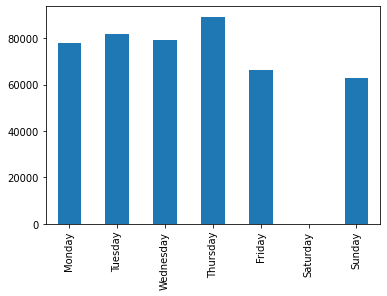

In [29]:
#acquisti per giorno della settimana
temp = df.copy()
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["GiornoSettimana"] = pd.to_datetime(temp['BasketDate']).dt.day_name()
print(temp.GiornoSettimana.value_counts())
#print(temp.GiornoSettimana.value_counts().plot.bar())

DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp.GiornoSettimana.value_counts().reindex(DAYS, fill_value=0).plot(kind="bar")

In [30]:
temp = df.drop("CustomerID",axis=1)
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date

temp["BasketDate"] = pd.to_datetime(temp["BasketDate"] - pd.to_timedelta(7,unit="d") )
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.day_name()
print("Acquisti di sabato: ", temp[temp["BasketDate"]=="Saturday"]["BasketDate"].count())
print("Acquisti di sabato: ", temp[temp["BasketDate"]=="saturday"]["BasketDate"].count())

Acquisti di sabato:  0
Acquisti di sabato:  0


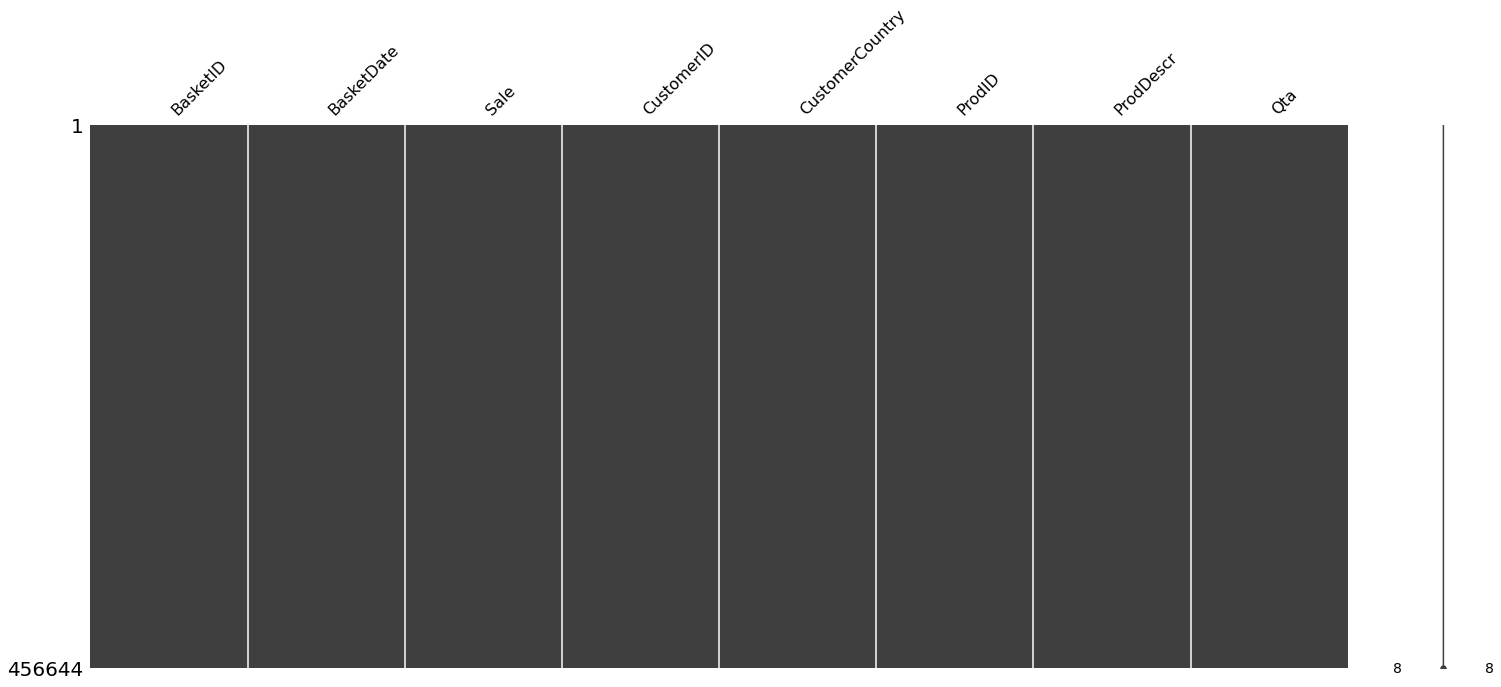

In [31]:
import missingno as msno
msno.matrix(df)


## Prodotto con maggior fatturato
Supponiamo di avere i seguenti esempi:

CustomerID ProdID Sale Qta

1. 111 112 15 8

2. 111 112 15 8 (uguale alla riga precedente cambia solo la quantità)

3. 111 123 2 -50

4. 111 123 2 +50

5. 111 123 8 50 (uguale alla 4 ma cambia il sale (lo considero come prodotto differente))

6. 111 123 8 -30


Ciò che voglio ottenere è 

ID ProdID Sale Qta

111 112 15 16

111 123 2 0

111 123 8 20


Infine moltiplicare le quantità per i relativi sale, eseguire una group by per prodID e aggregare con i totali ottenuti in precedenza. 


In [32]:
print("--------------------\nDropping duplicates\n--------------------")
show_duplicates = df[["CustomerID",  "ProdID","Sale","Qta"]]
show_duplicates.Sale = show_duplicates.Sale.astype(float)
########################## CODE TO ELIMINATE DUPLICATES OR POSITIVE+NEGATIVE QUANTITATIVE FOR SAME PROD ID AND SALE
show_duplicates["CustomerID"] = show_duplicates["CustomerID"].fillna(10000000)
show_duplicates = show_duplicates.groupby( ["CustomerID",  "ProdID","Sale"]).agg({"Qta":sum})
print(show_duplicates)
print("QUANTITIES NOT CONSIDERED DURING OPERATIONS: ", str(show_duplicates.sum().sum() - df["Qta"].sum()))
print("Len original dataset", str(len(df)))
print("Len dropped dataset", str(len(show_duplicates)))
print("Space saved: ", str(len(df) -len(show_duplicates)))
data = []

for i in range(len(show_duplicates)):
    temp = show_duplicates.iloc[i]
    data.append([temp.name[0],temp.name[1],temp.name[2],temp["Qta"]])
actual_dataset = pd.DataFrame(data, columns = [ "CustomerID",  "ProdID","Sale","Qta"])
actual_dataset["Total"] = (actual_dataset["Sale"]*actual_dataset["Qta"])

--------------------
Dropping duplicates
--------------------
                        Qta
CustomerID ProdID Sale     
10023N     20674  1.25   16
           20676  1.25   16
           20682  3.25    6
           20749  7.95    6
           20963  1.25   30
...                     ...
99983N     90019B 5.40    1
           90128C 2.46    1
           90200A 4.15    1
           90201D 2.90    1
           90214S 0.83    1

[335744 rows x 1 columns]
QUANTITIES NOT CONSIDERED DURING OPERATIONS:  0
Len original dataset 456644
Len dropped dataset 335744
Space saved:  120900


<BarContainer object of 11 artists>

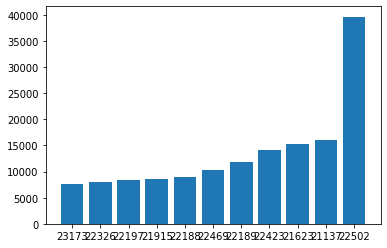

In [37]:
temp = actual_dataset.nlargest(11, 'Total').sort_values("Total")
plt.bar(temp["ProdID"], temp["Total"], align='center')

In [34]:
print("--------------------\nDropping duplicates\n--------------------")
df = pd.read_csv("dataset/TC-dataset.csv", sep="\t",index_col=0)
dataset_qta = df[[ "ProdID","Sale","Qta"]]
#dataset_qta.Sale = show_duplicates.Sale.astype(float)
########################## CODE TO ELIMINATE DUPLICATES OR POSITIVE+NEGATIVE QUANTITATIVE FOR SAME PROD ID AND SALE
#dataset_qta["CustomerID"] = dataset_qta["CustomerID"].fillna(10000000)
dataset_qta = dataset_qta[(dataset_qta["Qta"] < - 5000) & (dataset_qta["Sale"]>0)]
dataset_qta = dataset_qta.groupby( ["ProdID","Sale"]).agg({"Qta":sum})
print(dataset_qta)
print("QUANTITIES NOT CONSIDERED DURING OPERATIONS: ", str(dataset_qta.sum().sum() - df["Qta"].sum()))
print("Len original dataset", str(len(df)))
print("Len dropped dataset", str(len(show_duplicates)))
print("Space saved: ", str(len(df) -len(show_duplicates)))

--------------------
Dropping duplicates
--------------------
               Qta
ProdID Sale       
23166  1.04 -74215
23843  2.08 -80995
84347  0.03  -9360
QUANTITIES NOT CONSIDERED DURING OPERATIONS:  -5221809
Len original dataset 471910
Len dropped dataset 335744
Space saved:  136166


In [35]:
data=[]
for i in range(len(dataset_qta)):
    temp = dataset_qta.iloc[i]
    data.append([temp.name[0],temp.name[1],temp["Qta"]])
dataset_qta = pd.DataFrame(data, columns = [  "ProdID","Sale","Qta"])
dataset_qta["Total"] = (dataset_qta["Sale"]*dataset_qta["Qta"])


In [41]:
result =dataset_qta.groupby("ProdID")["Qta"].sum()
print(result)
top_resi = result.nsmallest(30)
for i in range(len(top_resi)):
    top_resi.iloc[i] *= -1
top_resi.plot(kind="barh")
plt.ylabel("ProdID")
plt.xlabel("Qta")

plt.show() 

ProdID
23166   -74215
23843   -80995
84347    -9360
Name: Qta, dtype: int64


'top_resi = result.nsmallest(30)\nfor i in range(len(top_resi)):\n    top_resi.iloc[i] *= -1\ntop_resi.plot(kind="barh")\nplt.ylabel("ProdID")\nplt.xlabel("Qta")\n\nplt.show() '

In [ ]:
temp = df
temp["BasketDate"] = pd.to_datetime(temp["BasketDate"]).dt.BasketDate
